**Author** : Bachu Sai Venkata Nitin

**Topic** : Customer Churn Prediction

**Date Created** : June 21,2022

[Link to download the Dataset](https://www.kaggle.com/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv)

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Datasets'

/content/drive/MyDrive/Datasets


In [4]:
ls

'Churn Modelling.csv'


In [5]:
import os

#### Importing necessary libraries

In [6]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library
import os #using os commands between the python language
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset= pd.read_csv('/content/Churn Modelling.csv') #load the csv file as dataframe
df=pd.read_csv('/content/Churn Modelling.csv')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
print(f'There are {len(dataset.columns)} columns in the dataset ')    # Finding number of columns in dataset
print(dataset.columns)

There are 14 columns in the dataset 
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [14]:
dataset.shape     # dimensions of dataset

(10000, 14)

In [15]:
dataset.head(10)                       # Ten rows from top

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [16]:
dataset.tail(10)             # Ten rows from bottom

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


*Let's drop first three columns as they have no significance*

In [17]:
dataset=dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)


In [18]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [19]:
df.shape

(10000, 11)

In [20]:
dataset.isnull().sum()       # Check for Null values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no null values in the dataset. Cheers! 🎊

In [21]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Let's define a function that plots a bar graph for `value_counts` of categorical data

In [22]:
def plot_count(feature):
   plt.grid(True)
   font = {'family': 'serif',
        'color':  'cornflowerblue',
        'weight': 'normal',
        'size': 16,
        }
   dataset[feature].value_counts().plot(kind='barh',figsize=(8, 6))
   plt.xlabel("Count", labelpad=14,fontdict=font,color='darkred')
   plt.ylabel(feature+" variable", labelpad=14,fontdict=font,color='darkred')
   plt.title("Count of "+feature+" Variable per category", y=1.02,fontdict=font,color='darkred');

In [23]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

So, The data contains customer details from `3` different countries 🙂

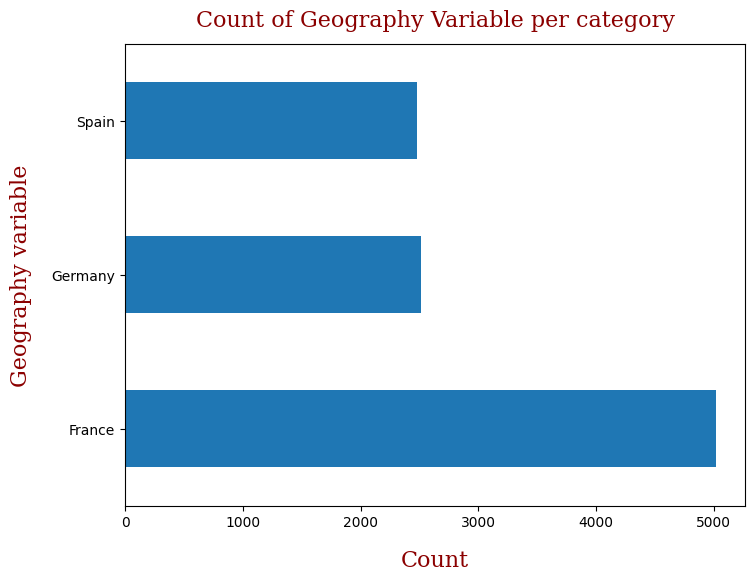

In [24]:
plot_count('Geography')

In [25]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

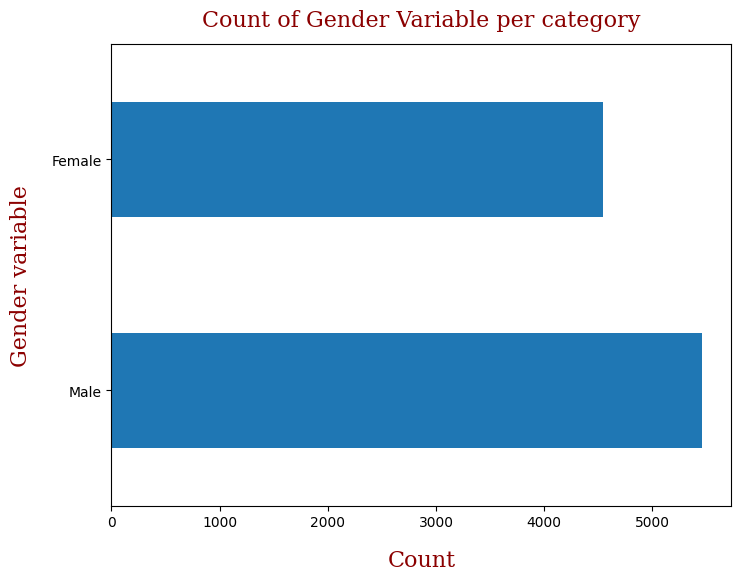

In [26]:
plot_count('Gender')

Let's Find percentage of people who got Exited.

In [27]:
100*dataset['Exited'].value_counts()/len(dataset['Exited'])

0    79.63
1    20.37
Name: Exited, dtype: float64

From the above info we can infer that approximately `20` percentage of total are about to leave.😥

Now, Lets plot a Bar Graph for that *Exited* column ✌





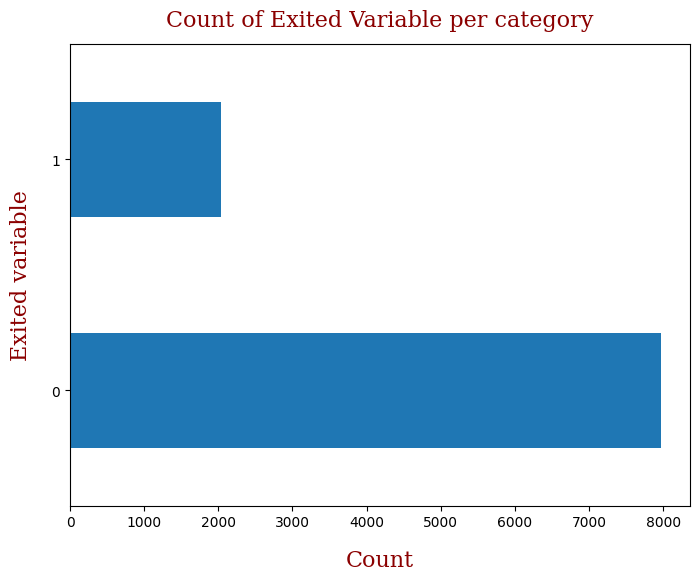

In [28]:
plot_count('Exited')

Clearly most of the people wont exit. Even though we need to make sure that they stay long. .😎

#### For HasCrCard

In [29]:
dataset['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

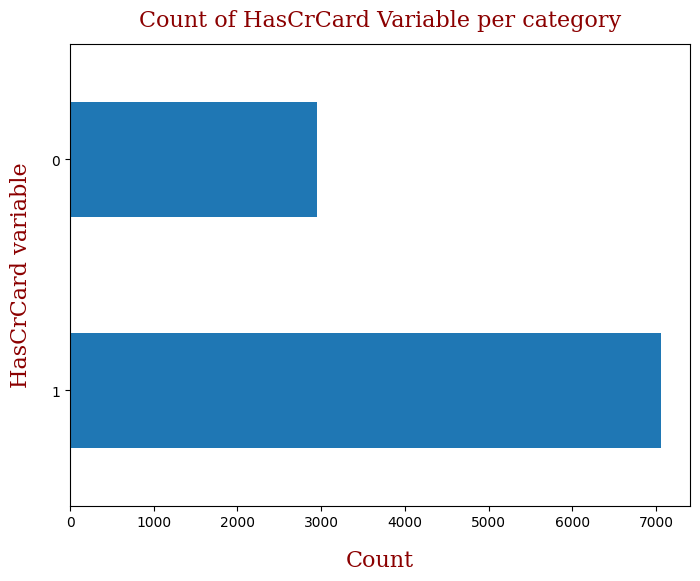

In [30]:
plot_count('HasCrCard')

#### For Number of ActiveMembers

In [31]:
dataset['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

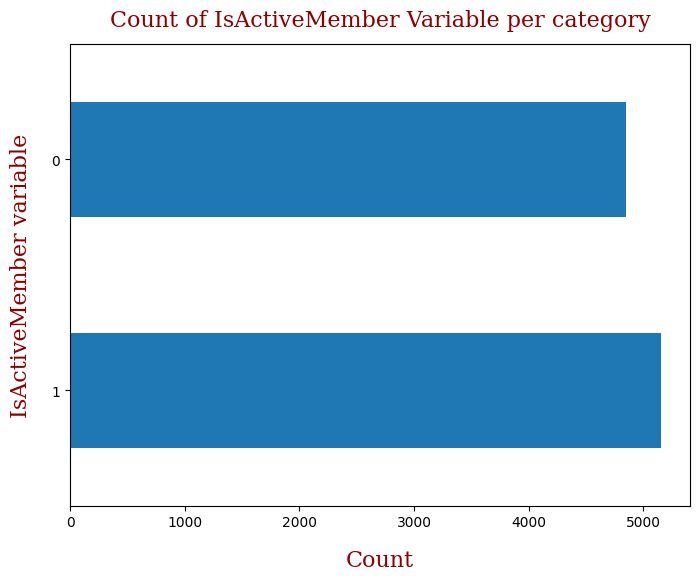

In [32]:
plot_count('IsActiveMember')

#### For Number of Products

In [33]:
dataset['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

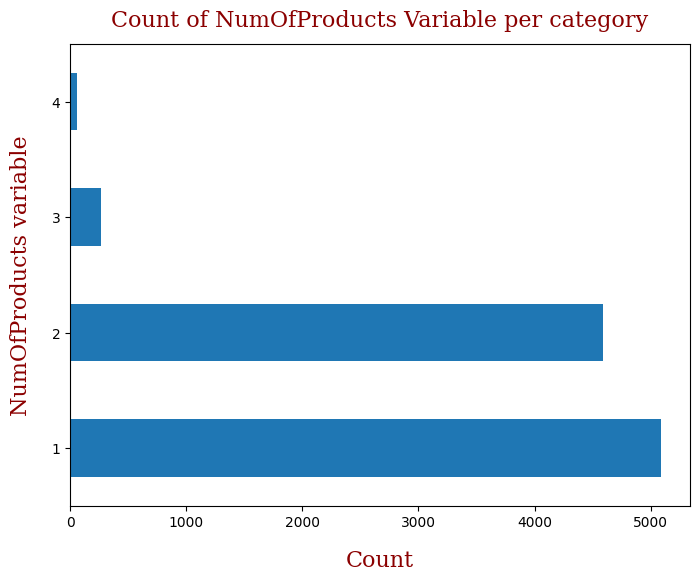

In [34]:
plot_count('NumOfProducts')

In [35]:
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We can see that there exists two categorical variables i.e: *Geography and Gender*. We cant find correlation using heatmaps if there are `categorical` variables because heatmaps dont work on categorical variables.

*We shall encode variables* 🛠

#### Function To Print the users in a category for specific Geographic Location

In [36]:
def Calculate(Geography,Feature):
  Geography_list=dataset['Geography']
  Variable_List=dataset[Feature]              # Contains a column from dataset
  li=[]
  for i in range(len(Geography_list)):
    if Geography_list[i]== Geography:
       li.append(Variable_List[i])

  return sum(li)


#### Let us Analyse France over `4` cols `HasCrCard`,`IsActiveMember`,`NumOfProducts` and `Exited`

In [37]:
Result=Calculate('France','HasCrCard')
print(f'There are {Result} people in france having Credit cards')
Result=Calculate('France','Exited')
print(f'There are {Result} people in France who exited the bank')
Result=Calculate('France','IsActiveMember')
print(f'There are {Result} people active from France')
Result=Calculate('France','NumOfProducts')
print(f'The number of products purchased from France is  {Result}')

There are 3543 people in france having Credit cards
There are 810 people in France who exited the bank
There are 2591 people active from France
The number of products purchased from France is  7676


#### Let us Analyse Spain over `4` cols `HasCrCard`,`IsActiveMember`,`NumOfProducts` and `Exited`

In [38]:
Result=Calculate('Spain','HasCrCard')
print(f'There are {Result} people in Spain having Credit cards')
Result=Calculate('Spain','Exited')
print(f'There are {Result} people in Spain who exited the bank')
Result=Calculate('Spain','IsActiveMember')
print(f'There are {Result} people active from Spain')
Result=Calculate('Spain','NumOfProducts')
print(f'The number of products purchased from Spain is  {Result}')

There are 1721 people in Spain having Credit cards
There are 413 people in Spain who exited the bank
There are 1312 people active from Spain
The number of products purchased from Spain is  3813


#### Let us Analyse Germany over `4` cols `HasCrCard`,`IsActiveMember`,`NumOfProducts` and `Exited`

In [39]:
Result=Calculate('Germany','HasCrCard')
print(f'There are {Result} people in Germany having Credit cards')
Result=Calculate('Germany','Exited')
print(f'There are {Result} people in Germany who exited the bank')
Result=Calculate('Germany','IsActiveMember')
print(f'There are {Result} people active from Germany')
Result=Calculate('Germany','NumOfProducts')
print(f'The number of products purchased from Germany is  {Result}')

There are 1791 people in Germany having Credit cards
There are 814 people in Germany who exited the bank
There are 1248 people active from Germany
The number of products purchased from Germany is  3813


#### Pair Plot

*Let us now find the relationship between variables*

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

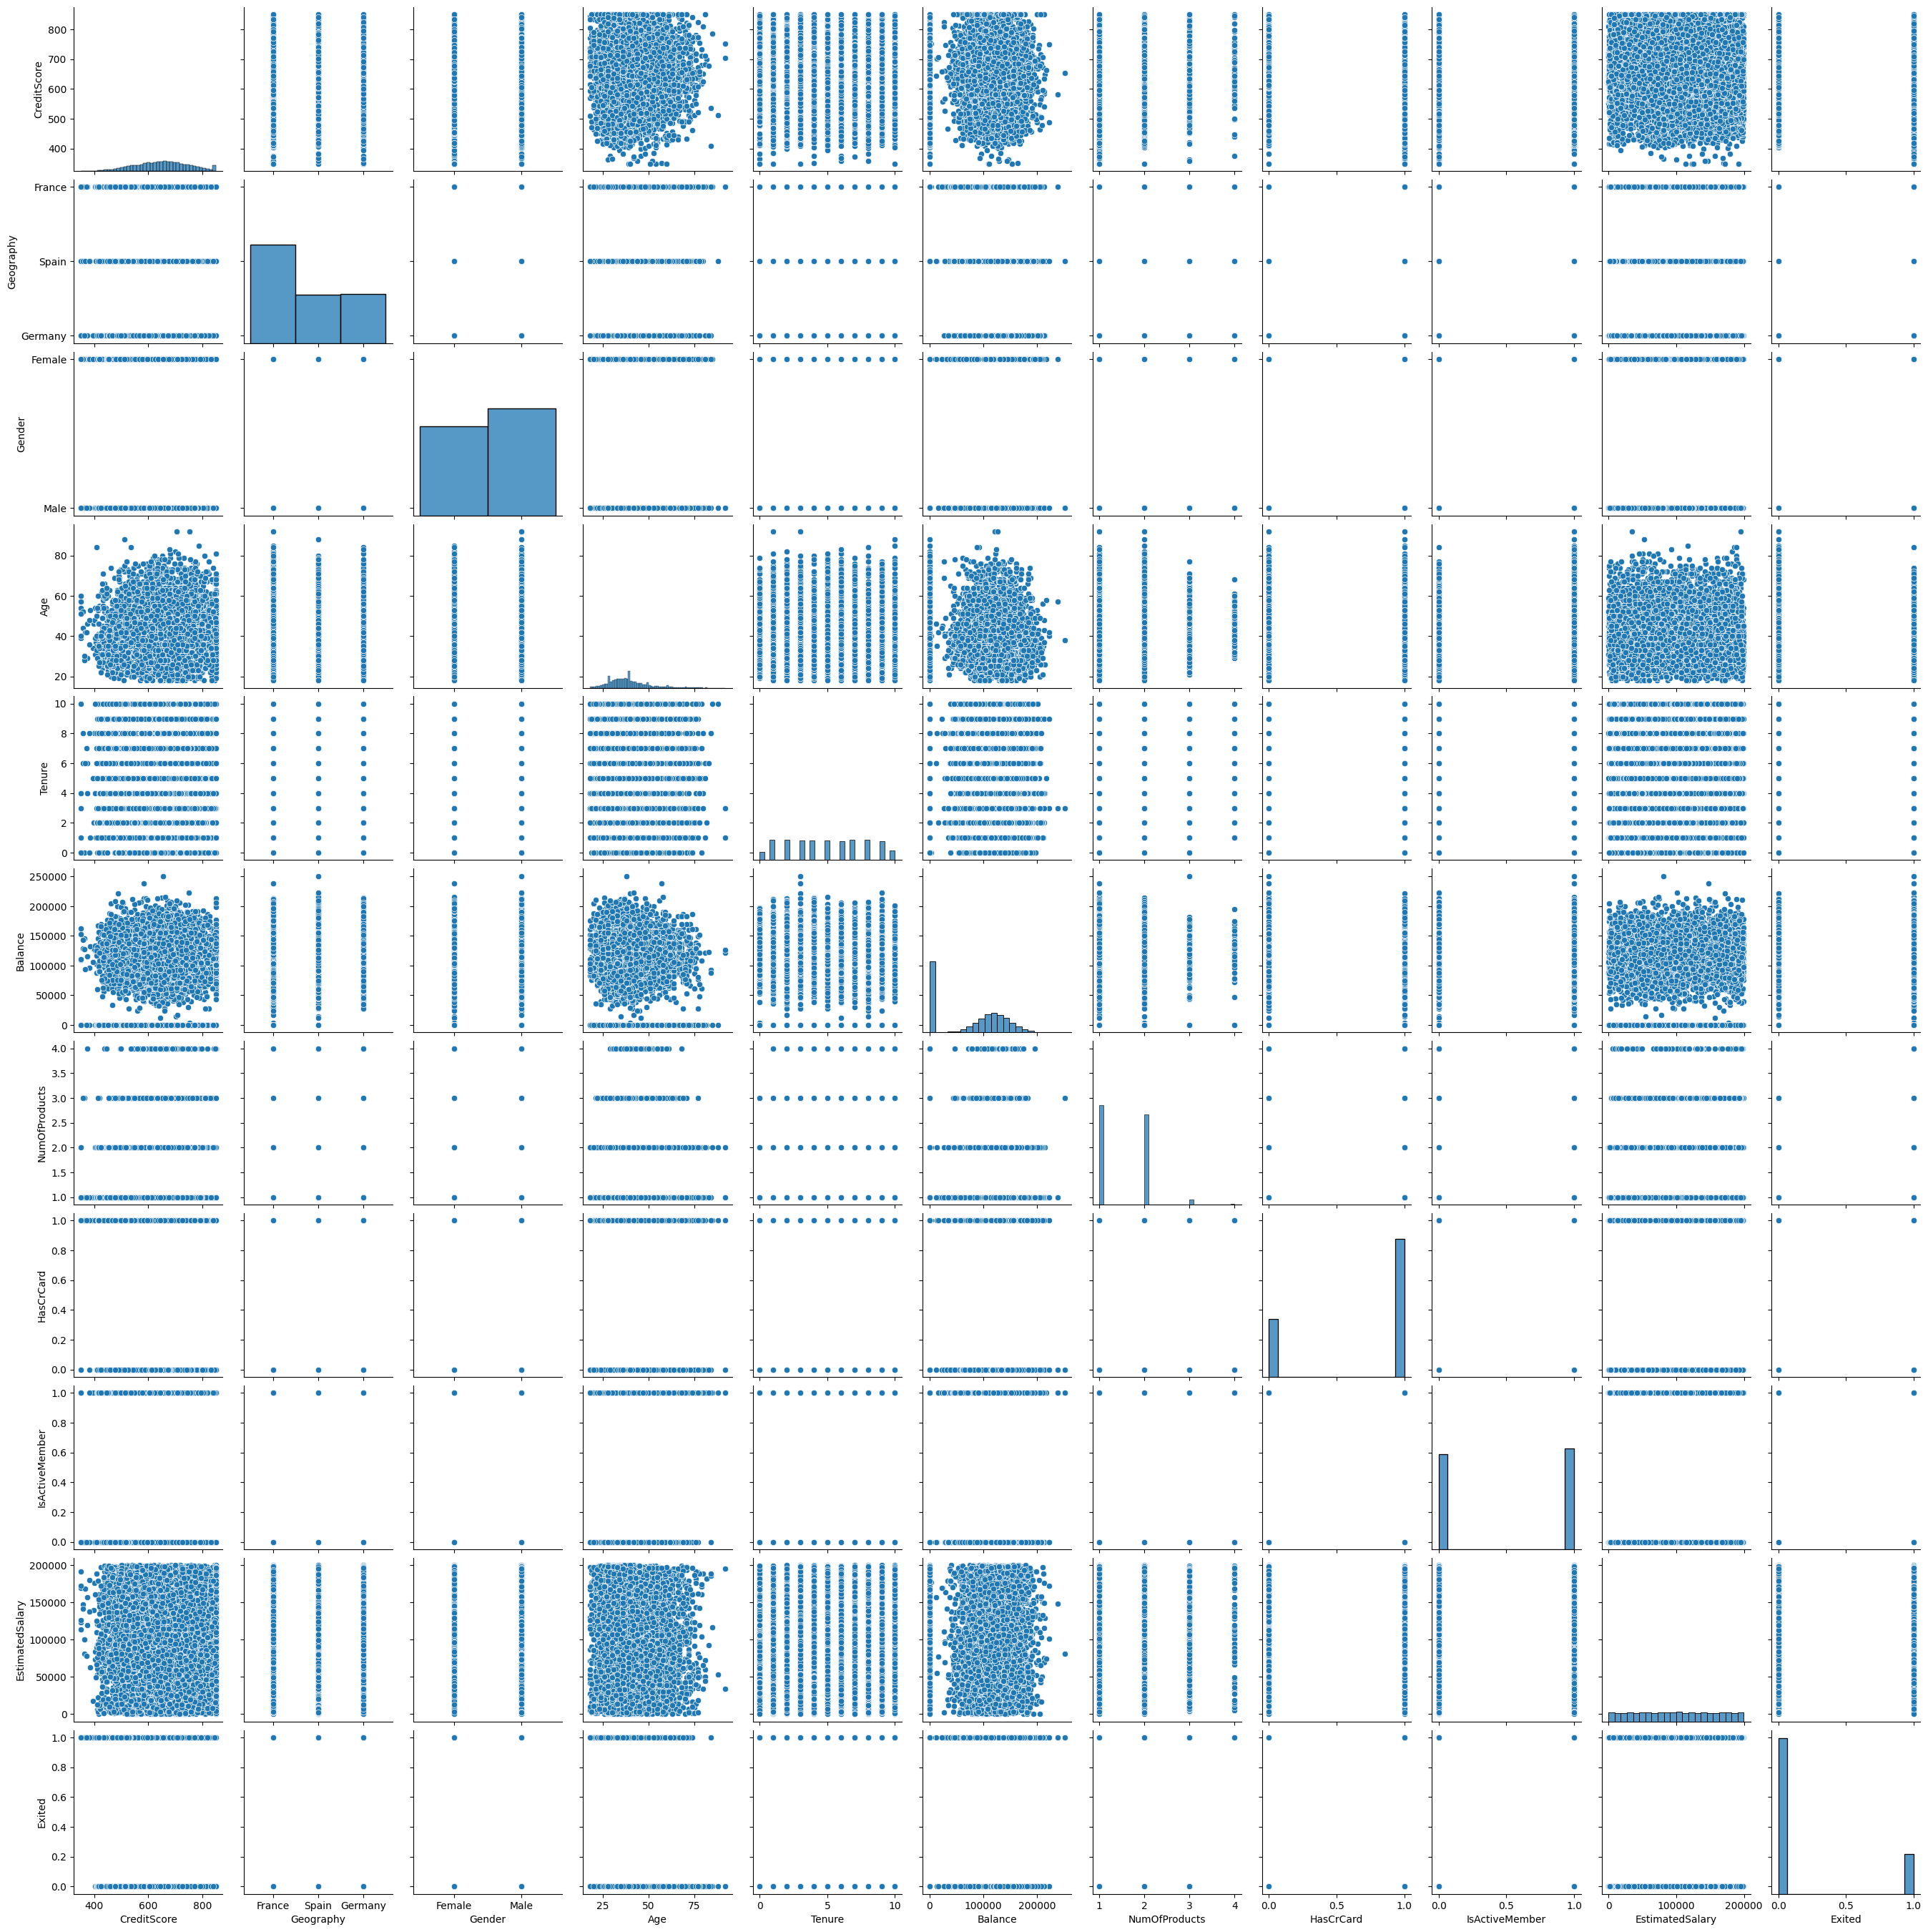

In [40]:
sns.pairplot(dataset,
             x_vars = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
             y_vars =  ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
        palette='husl'
             )


#### Strip Plot

<Axes: xlabel='Age', ylabel='Balance'>

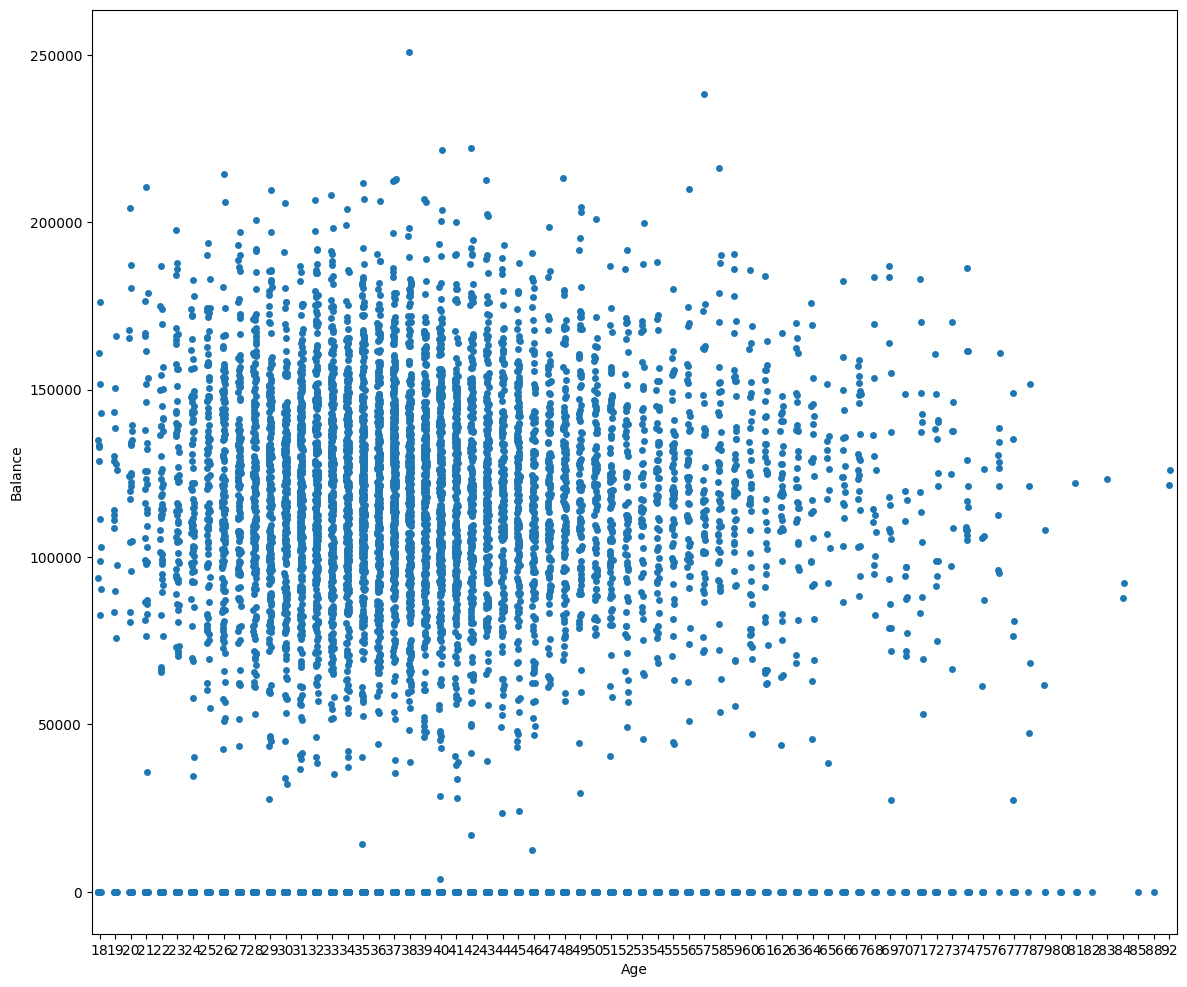

In [41]:
fig_dims = (14, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y='Balance', x='Age', data=dataset, hue=None)

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

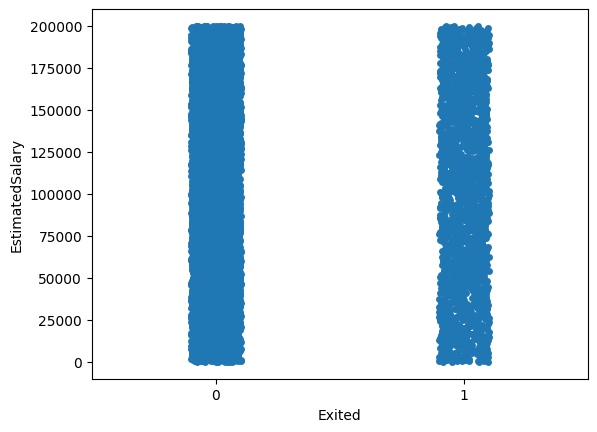

In [42]:
sns.stripplot(x="Exited", y="EstimatedSalary", data=dataset)

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

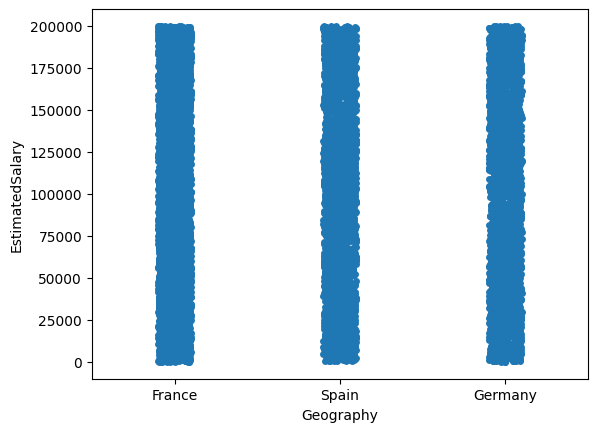

In [43]:
sns.stripplot(x="Geography", y="EstimatedSalary", data=dataset)

*There is no bias in salary estimate as max salary is almost same for all locations mentioned* 🤔

*Encoding Categorical Variables*

In [44]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


*Finding Correlation*

In [45]:
dataset.corr()

<ipython-input-45-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


### HeatMap

*Correlation ranges from -1 to +1 wheres as covariance varies from -${\infty}$ to +${\infty}$*


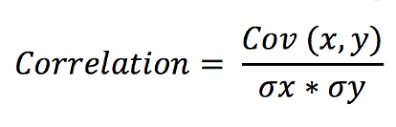

<ipython-input-46-828169d1ca74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap="PuBuGn")


<Axes: >

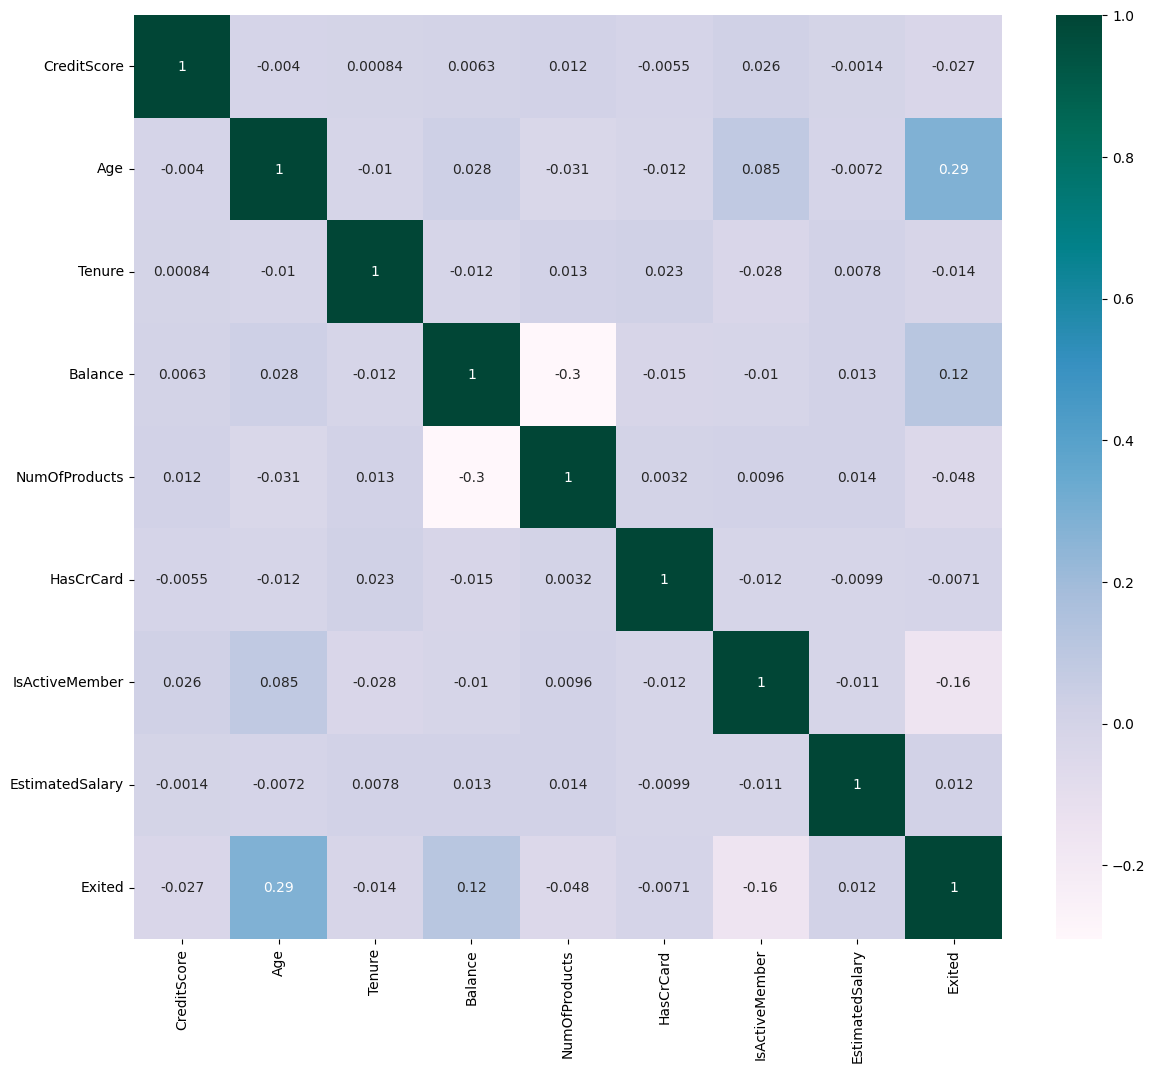

In [46]:
plt.subplots(figsize=fig_dims)
sns.heatmap(dataset.corr(),annot=True,cmap="PuBuGn")

### Splitting the Model

In [47]:
X = df.iloc[:, 0:-1].values       # We shall use df variable instead of dataset variable
y = df.iloc[:, -1].values

In [48]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


#### Label Encoding

**Encoded gender column into 1's annd 0's**

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

#### OneHotEncoding

**OneHotEncoding the Geography column**

<img src="https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png" />

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [51]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Using Sklearn Library to split the model into Train and Test**

In [52]:
from sklearn.model_selection import train_test_split
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

This is a formula similar to `z-score`

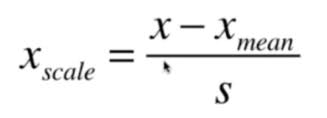

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainFeatures = sc.fit_transform(trainFeatures)
testFeatures = sc.transform(testFeatures)

In [54]:
print(trainFeatures)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


#Building Ann

**Cheers!** 😁

 *As the EDA and Data Processing is done. Let's build the model using ANN*

*Creating a Sequential Model*

In [55]:
ann = tf.keras.models.Sequential()

*Let's add first hidden Layer* 🐱‍🏍

In [56]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

*Let's add second hidden Layer* 🐱‍🏍🐱‍🏍

In [57]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

*Let's add first output Layer* 💖

In [58]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

*Compilation Of Model*  🛠

**Binary cross entropy is used for binary classification**

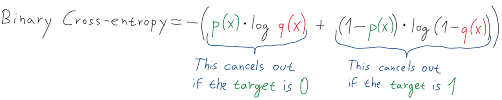

In [59]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

*Time to Prove the power of our model* 💪💪

In [60]:
ann.fit(trainFeatures, trainLabels, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5718 - accuracy: 0.7426
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7959
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.7956
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7974
Epoch 5/100
250/250 [==============================] - 0s 969us/step - loss: 0.4266 - accuracy: 0.8031
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8077
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8142
Epoch 8/100
250/250 [==============================] - 0s 942us/step - loss: 0.4103 - accuracy: 0.8185
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8245
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3925 - ac

*Hehe* 😎

**Our Model now has an accuracy of `85%` with loss `0.34`**

In [61]:
testPred = ann.predict(testFeatures)
print(testPred)
testPred_Transformed= (testPred > 0.5)


63/63 [==============================] - 0s 725us/step
[[0.32025135]
 [0.3060825 ]
 [0.18062796]
 ...
 [0.13244824]
 [0.17573744]
 [0.26491094]]


#####Confusion Matrix
**It's a matrix with dimesnions `(2,2)` where columns and rows are positives and negatives**

<img src="https://www.nbshare.io/static/snapshots/cm_colored_1-min.png" >

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(testLabels, testPred_Transformed)
print(cm)
accuracy_score(testLabels,testPred_Transformed)

[[1517   78]
 [ 207  198]]


0.8575

**Hurrah!** 🥳

On the test set our model has an accuracy of `86%`

Awww!! Let's now explore other models too 😁

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression     # Importing the necessary module
classifier = LogisticRegression(random_state = 0)       # Assigning variable to the model name
classifier.fit(trainFeatures, trainLabels)              # Fit the model

LogisticRegression(random_state=0)

In [64]:
pred_LR = classifier.predict(testFeatures)              # Prediction on testSet


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score          # Checking the accuracy and confusion matrix
cm = confusion_matrix(testLabels, pred_LR)
print(cm)
accuracy_score(testLabels, pred_LR)

[[1526   69]
 [ 309   96]]


0.811

### Support Vector Machines


In [66]:
from sklearn.svm import SVC                                   # Importing the necessary module
classifier_SVM = SVC(kernel = 'linear', random_state = 0)     # Assigning variable to the model name
classifier_SVM.fit(trainFeatures, trainLabels)                # Fit the model

SVC(kernel='linear', random_state=0)

In [67]:
pred_SVM = classifier_SVM.predict(testFeatures)               # Prediction on testSet

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score   # Checking the accuracy and confusion matrix
cm_SVM = confusion_matrix(testLabels, pred_SVM)
print(cm_SVM)
accuracy_score(testLabels, pred_SVM)

[[1595    0]
 [ 405    0]]


0.7975

### RandomForest

In [69]:
from sklearn.ensemble import RandomForestClassifier                                                    # Importing the necessary module
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)     # Assigning variable to the model name
classifier_RF.fit(trainFeatures, trainLabels)                                                          # Fit the model

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [70]:
pred_RF = classifier_RF.predict(testFeatures)        # Prediction on testSet

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score              # Checking the accuracy and confusion matrix
cm_RF = confusion_matrix(testLabels,pred_RF)
print(cm_RF)
accuracy_score(testLabels, pred_RF)

[[1531   64]
 [ 217  188]]


0.8595

## XGB

In [72]:
from xgboost import XGBClassifier                                 # Importing the necessary module
classifier_XGB = XGBClassifier()                                  # Assigning variable to the model name
classifier_XGB.fit(trainFeatures,trainLabels)                     # Fit the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
pred_XGB = classifier_XGB.predict(testFeatures)                          # Prediction on testSet


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score              # Checking the accuracy and confusion matrix
cm_XGB = confusion_matrix(testLabels,pred_XGB)
print(cm_XGB)
accuracy_score(testLabels, pred_XGB)

[[1497   98]
 [ 196  209]]


0.853

## KNN

<Axes: >

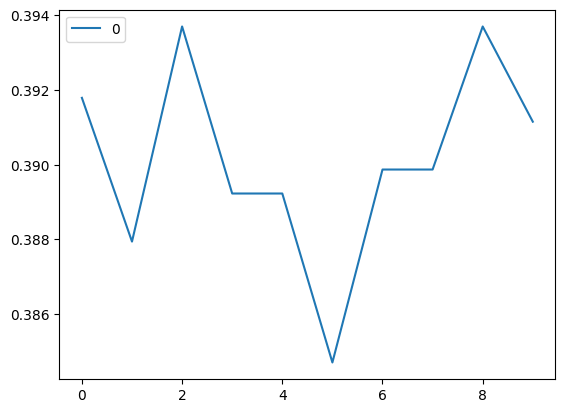

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
rmse=[]

for i  in range(20,30):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(trainFeatures,trainLabels)
    preds=knn.predict(testFeatures)
    error = sqrt(mean_squared_error(testLabels,preds))
    rmse.append(error)


curve = pd.DataFrame(rmse)
curve.plot()

In [77]:
# From the graph we can see that the best K value is 25
from sklearn.neighbors import KNeighborsClassifier                                     # Importing the necessary module
classifier_KNN = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2)    # Assigning variable to the model name
classifier_KNN.fit(trainFeatures,trainLabels)                                          # Fit the model

KNeighborsClassifier(n_neighbors=25)

In [78]:
pred_KNN = classifier_KNN.predict(testFeatures)                                        # Prediction on testSet

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score                             # Checking the accuracy and confusion matrix
cm_KNN = confusion_matrix(testLabels,pred_KNN)
print(cm_KNN)
accuracy_score(testLabels, pred_KNN)

[[1562   33]
 [ 263  142]]


0.852

## Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier                                     # Importing the necessary module
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)     # Assigning variable to the model name
classifier_DT.fit(trainFeatures,trainLabels)                                        # Fit the model

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [81]:
pred_DT = classifier_DT.predict(testFeatures)                                       # Prediction on testSet

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score                         # Checking the accuracy and confusion matrix
cm_DT = confusion_matrix(testLabels,pred_DT)
print(cm_DT)
accuracy_score(testLabels, pred_DT)

[[1379  216]
 [ 174  231]]


0.805

#### Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
classifier_gb=gbc(n_estimators=200,max_depth=3,learning_rate=0.1)
classifier_gb.fit(trainFeatures,trainLabels)

GradientBoostingClassifier(n_estimators=200)

In [84]:
pred_GB=classifier_gb.predict(testFeatures)
cm_GB=confusion_matrix(testLabels,pred_GB)
print(cm_GB)
accuracy_score(testLabels, pred_GB)

[[1519   76]
 [ 190  215]]


0.867

## Observations:
As we've done the classification using different algorithms on Multivariate Dataset. The accuracies are as below:

**1.XGboost   : 86%  (First Place)🥇**

**2.Gradient Boosting: 86% (Second Place)🥈**

**3. Artificial Neural Networks : 85%  (Third Place)🥉**

**4. Random Forest : 85% Approx**

**5. KNN : 83%**

**6. Decision Trees : 80%**

**7. Logistic Regression : 80%**

**8. Support Vector Machines : 80% Approx**





*Though all the models are having good accuracy, true negatives are correctly being predicted bt ANN, XGB, Decision Trees*

### Weighted Average of three models

* Lets Assign weight to the predictions of `XGBOOST`,`GradientBoosting`,`Decision Trees`

In [85]:
Weighted_Preds=((0.34*pred_XGB)+(0.33*pred_GB)+(0.33*pred_DT))
Weighted_Preds=(Weighted_Preds>=0.5)
print(Weighted_Preds)

[False False False ... False False False]


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_Weighted = confusion_matrix(testLabels,Weighted_Preds)
print(cm_Weighted)
accuracy_score(testLabels, Weighted_Preds)

[[1507   88]
 [ 191  214]]


0.8605

## End of Code 😎